In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-77.69473931532931 17.752678501452124
11.234891921579347 -83.31139286998113
-32.96653857392258 55.548671965752675
-31.512175131093876 156.47161414800001
-58.58776889842693 103.57281882611795
-82.05640691480218 85.66379102875163
86.34456450969498 -164.6246282693794
57.51005735650986 52.12515432431556
-12.486450922627157 -8.276740118924494
-19.58525857457228 175.27847024956242
-45.34671869436759 90.73934154356505
63.90856775124038 -117.5248967957885
77.09915744433565 56.90093880059865
-74.73436762580266 -14.634826152716215
-8.041564311465834 -20.6211466781115
-49.102308418312326 161.2926644829621
-20.739093997304295 116.29527281745072
50.8305498990313 -136.19000411015563
29.31592660729393 90.36227763721996
-0.6271959256444433 -134.50897330021462
67.22080243033005 -11.406265144628122
-8.53015187291787 -83.2013388162326
60.45910574434748 24.884214890061088
-39.789481373638104 92.42016499061646
-69.21133542768857 -88.26628335892148
-39.87930871813015 134.09090008177117
19.157562892950367 17

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a1a29686f4114ad03fde7106558097b


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bredasdorp
Processing Record 2 of Set 13 | bluefields
Processing Record 3 of Set 13 | saint-joseph
Processing Record 4 of Set 13 | sawtell
Processing Record 5 of Set 13 | busselton
Processing Record 6 of Set 13 | barrow
Processing Record 7 of Set 13 | selty
Processing Record 8 of Set 13 | jamestown
Processing Record 9 of Set 13 | isangel
Processing Record 10 of Set 13 | yellowknife
Processing Record 11 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 13 | cape town
Processing Record 13 of Set 13 | georgetown
Processing Record 14 of Set 13 | tuatapere
Processing Record 15 of Set 13 | karratha
Processing Record 16 of Set 13 | sitka
Processing Record 17 of Set 13 | lasa
Processing Record 18 of Set 13 | atuona
Processing Record 19 of Set 13 | hofn
Processing Record 20 of Set 13 | pimentel
Processing Record 21 of Set 13 | nurmijarvi
Processing Record 22 of Set 13 | pu

Processing Record 35 of Set 16 | avera
Processing Record 36 of Set 16 | itarema
Processing Record 37 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 16 | port augusta
Processing Record 39 of Set 16 | envira
Processing Record 40 of Set 16 | olafsvik
Processing Record 41 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 16 | broome
Processing Record 43 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 16 | makat
Processing Record 45 of Set 16 | verkhnyaya balkariya
Processing Record 46 of Set 16 | pevek
Processing Record 47 of Set 16 | ninghai
Processing Record 48 of Set 16 | port alfred
Processing Record 49 of Set 16 | esso
Processing Record 50 of Set 16 | oyama
Processing Record 1 of Set 17 | kattivakkam
Processing Record 2 of Set 17 | pitkyaranta
Processing Record 3 of Set 17 | krasnoselkup
Processing Record 4 of Set 17 | kirkuk
Processing Record 5 of Set 17 | springdale
Processing Record 6 o

Processing Record 21 of Set 20 | san quintin
Processing Record 22 of Set 20 | trecate
Processing Record 23 of Set 20 | kalang
Processing Record 24 of Set 20 | murud
Processing Record 25 of Set 20 | thies
Processing Record 26 of Set 20 | padang
Processing Record 27 of Set 20 | nogales
Processing Record 28 of Set 20 | waspan
Processing Record 29 of Set 20 | wembley
Processing Record 30 of Set 20 | sorvag
City not found. Skipping...
Processing Record 31 of Set 20 | huntsville
Processing Record 32 of Set 20 | calbuco
Processing Record 33 of Set 20 | airai
Processing Record 34 of Set 20 | jibuti
Processing Record 35 of Set 20 | maurawan
Processing Record 36 of Set 20 | polson
Processing Record 37 of Set 20 | sao goncalo do amarante
Processing Record 38 of Set 20 | krasnoborsk
Processing Record 39 of Set 20 | benjamin hill
Processing Record 40 of Set 20 | roma
Processing Record 41 of Set 20 | potosi
Processing Record 42 of Set 20 | saryshagan
City not found. Skipping...
Processing Record 43 

Processing Record 8 of Set 24 | koslan
Processing Record 9 of Set 24 | vancouver
Processing Record 10 of Set 24 | mercedes
Processing Record 11 of Set 24 | puerto maldonado
Processing Record 12 of Set 24 | ye
City not found. Skipping...
Processing Record 13 of Set 24 | yeppoon
Processing Record 14 of Set 24 | saryagash
Processing Record 15 of Set 24 | twentynine palms
Processing Record 16 of Set 24 | mabaruma
Processing Record 17 of Set 24 | tooele
Processing Record 18 of Set 24 | mersing
Processing Record 19 of Set 24 | lazaro cardenas
Processing Record 20 of Set 24 | los llanos de aridane
Processing Record 21 of Set 24 | san rafael
Processing Record 22 of Set 24 | madang
Processing Record 23 of Set 24 | ballina
Processing Record 24 of Set 24 | rawson
Processing Record 25 of Set 24 | litovko
Processing Record 26 of Set 24 | ekibastuz
Processing Record 27 of Set 24 | chipinge
Processing Record 28 of Set 24 | sept-iles
Processing Record 29 of Set 24 | zachagansk
City not found. Skipping

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,64.76,81,3,2.30,ZA,2023-01-13 21:31:16
1,Bluefields,12.0137,-83.7635,84.27,74,40,9.22,NI,2023-01-13 21:31:16
2,Saint-Joseph,-21.3667,55.6167,75.58,80,96,9.01,RE,2023-01-13 21:31:16
3,Sawtell,-30.3833,153.1000,73.42,73,88,5.75,AU,2023-01-13 21:31:17
4,Busselton,-33.6500,115.3333,56.03,69,0,13.29,AU,2023-01-13 21:31:17
5,Barrow,71.2906,-156.7887,-2.18,71,0,21.85,US,2023-01-13 21:27:05
6,Selty,57.3132,52.1345,13.15,87,100,13.58,RU,2023-01-13 21:31:18
7,Jamestown,42.0970,-79.2353,26.19,72,100,11.50,US,2023-01-13 21:29:05
8,Isangel,-19.5500,169.2667,82.51,74,20,2.30,VU,2023-01-13 21:31:19
9,Yellowknife,62.4560,-114.3525,-10.44,77,75,8.05,CA,2023-01-13 21:31:19


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

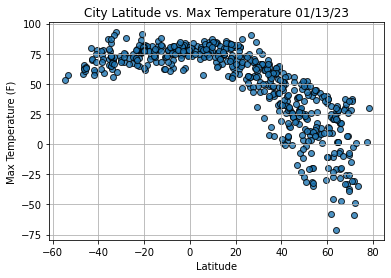

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

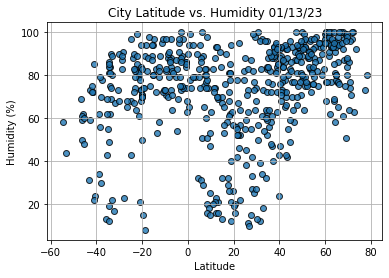

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

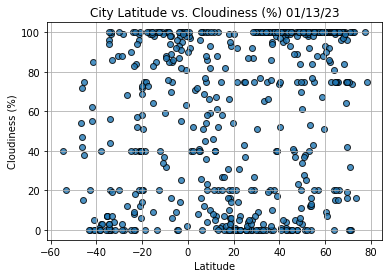

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

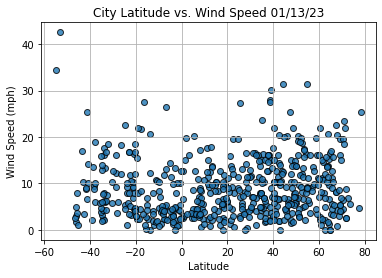

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

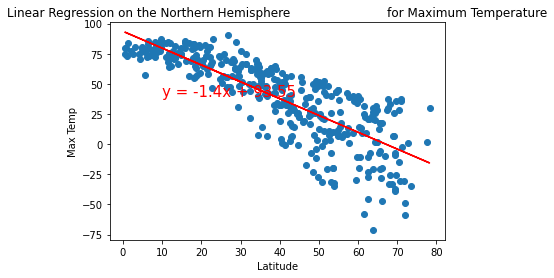

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

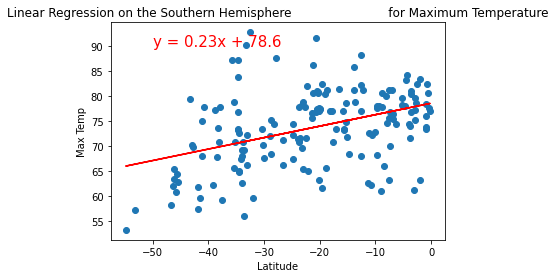

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

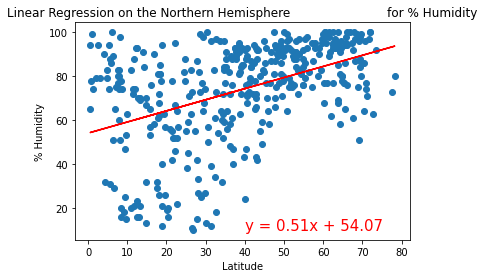

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

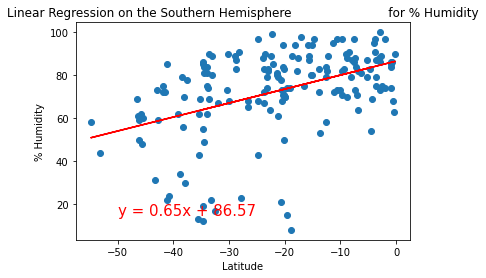

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

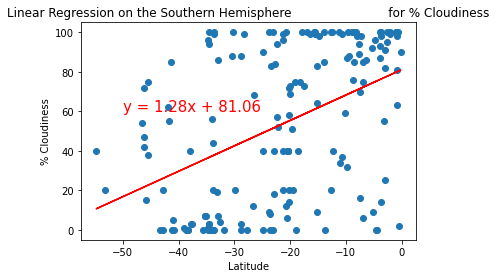

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

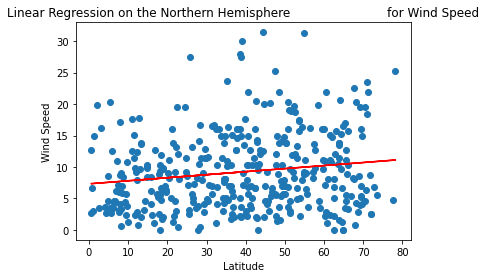

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

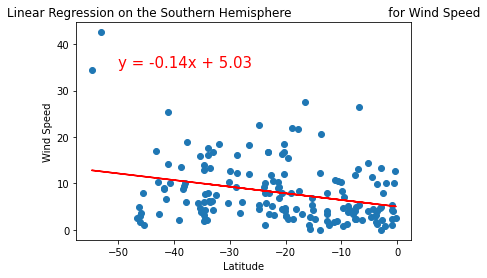

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))